<a href="https://colab.research.google.com/github/SvanaBirgis/Reiknifraedi/blob/main/Skilaverkefni/S13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Verkefni VV5 - Flokkun veðurgagna með k-means reikniriti

1. Lesið skrána http://cs.hi.is/python/hiti-urkoma.txt inn í þrjá vigra: ár, hiti, úrkoma. Búið svo til  fylki úr hita og úrkomu (t.d. með ```X = np.c_[...]```), staðlið það með ```whiten``` og flokkið í fjóra hópa með k-means reikniritinu. Hafið ```npr.seed()``` með svo sömu flokkar fáist við endurteknar keyrslur. Hverjir eru miðpunktar hópanna og hvað eru mörg ár í hverjum hópi?

2. Teiknið mynd af hópunum eins og gert er í sýnidæminu í kafla 3.6; merkið m.a. miðpunktana inn með stjörnum. Notið ```qcmap``` til að velja liti og bætið svo við rúðuneti og ásamerkingum sbr. aftasta sýnidæmið í kafla A5 í Viðauka A. Bætið loks við litastiku eins og þar er gert sem sýnir flokkun áranna, en þau ættu að flokkast gróflega í þurr, blaut, heit og köld.

3. Teiknið nú nýja mynd þar sem árin eru flokkuð í 10 hópa. Merkið hópana á litastiku þessarar myndar með tölunum 1–10 og setjið ```label``` á stikuna: Flokkur. Látið litastiku þessarar myndar líka vera breiðari en á myndinni í lið 2.

In [20]:
#1
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
from scipy.cluster.vq import kmeans, vq, whiten

ár,hiti,úrkoma = np.loadtxt("https://cs.hi.is/python/hiti-urkoma.txt").T

X = np.c_[hiti,úrkoma]
npr.seed(23)
X = whiten(X)            # staðla gögn

(cb,d) = kmeans(X,4)
(x,y) = X.T
(mx,my) = cb.T
(code,dveq) = vq(X,cb)

def search(n,code):
  count = 0
  for tala in code:
    if(tala == n):
      count += 1
  return count


print(f'Miðpunktur hópanna eru x={mx} og y={my}')
print(f'Fjöldi ára í hóp 0: {search(0,code)}')
print(f'Fjöldi ára í hóp 1: {search(1,code)}')
print(f'Fjöldi ára í hóp 2: {search(2,code)}')
print(f'Fjöldi ára í hóp 3: {search(3,code)}')

Miðpunktur hópanna eru x=[6.83769634 4.15941886 5.37452998 6.01324224] og y=[4.27809624 4.24963666 3.61690936 5.80171902]
Fjöldi ára í hóp 0: 13
Fjöldi ára í hóp 1: 15
Fjöldi ára í hóp 2: 24
Fjöldi ára í hóp 3: 18


In [35]:
def qcmap(n):
   # Fjölgun scatter-lita upp í allt að 20
   # Bætið viðfangi 'cmap=qcmap(n)' við plt.scatter kall
   import matplotlib.colors as clrs
   use_cmap = 'Set1' if n <= 9 else 'tab20'
   cmap = plt.get_cmap(use_cmap)(range(n))
   if n > 5: cmap[5] = [0.95, 0.75, 0, 1]  # dekkja gula litinn
   return clrs.LinearSegmentedColormap.from_list("",cmap,n)

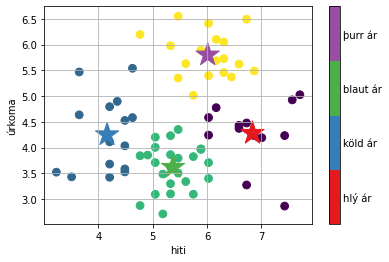

In [36]:
#2

lbl = ['hlý ár', 'köld ár', 'blaut ár', 'þurr ár'];
plt.scatter(x, y, s=60, c=code);
plt.scatter(mx, my, s=600, c=[0,1,2,3], marker='*', cmap=qcmap(4))
plt.xlabel('hiti'), plt.ylabel('úrkoma')
cb = plt.colorbar(ticks=range(4))
cb.set_ticklabels(lbl)
cb.ax.tick_params(size=0)
plt.clim(-0.5,4-0.5)
plt.grid()

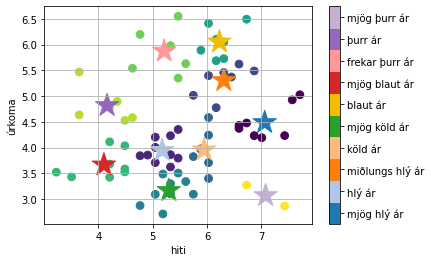

In [43]:
#3
(cb,d) = kmeans(X,10)
(x,y) = X.T
(mx,my) = cb.T
(code,dveq) = vq(X,cb)

lbl = ['mjög hlý ár', 'hlý ár', 'miðlungs hlý ár', 'köld ár', 'mjög köld ár', 'blaut ár', 'mjög blaut ár', 'frekar þurr ár', 'þurr ár', 'mjög þurr ár'];
plt.scatter(x, y, s=60, c=code);
plt.scatter(mx, my, s=600, c=[0,1,2,3,4,5,6,7,8,9], marker='*', cmap=qcmap(10))
plt.xlabel('hiti'), plt.ylabel('úrkoma')
cb = plt.colorbar(ticks=range(10))
cb.set_ticklabels(lbl)
plt.clim(-0.5,10-0.5)
plt.grid()


##Verkefni VV6 - Hlutapróf 2 vorið 2021

###A. Stiglar og lágmörkun

Gefið er fallið $$f(x,y)= x^2y + 2xy^2 - 3xy + 4$$

punkturinn $p = (1,1)$ og vigurinn $u = (-1,-1)$.

1. Ákvarðið stigul f (þ.e.a.s. $ \nabla f$), skrifið Python-fall sem finnur hann og notið það til að reikna $ \nabla f(p)$

2. Lát $u = (-1,-1)$. Notið Python-fallið úr a-lið líka til að reikna stefnuafleiðu $f$ í stefnu $u$ í punktinum $p$. Búið líka til einhvern punkt og vigur úr afmælisdegi ykkar og reiknið tilsvarandi stefnuafleiðu.

3. Lát $u = (-1,-1)$. Notið Python-fallið úr a-lið líka til að reikna stefnuafleiðu $f$ í stefnu $u$ í punktinum $p$. Búið líka til einhvern punkt og vigur úr afmælisdegi ykkar og reiknið tilsvarandi stefnuafleiðu.

4. Teiknið að lokum hæðarlínur $f$ á svæðinu $[0,3] \times [0,2]$.



In [51]:
#1 
def stigull(p):
    (x,y) = p
    return [(2*x*y + 2*y**2 -3*y),(x**2 + 4*y*x -3*x)]

p = [1,1]
print(stigull(p))

[1, 2]


In [52]:
#2
def stefnA(p,u):
  (x,y) = p
  (n,d) = u
  return (x*n + y*d)

u = [-1,-1]
print(f'Stefnuafleiða f í stefnu u er: {stefnA(stigull(p),u)}')

p1 = [15,3]
u1 = [19,99]
print(f'Stefnuafleiða úr afmælisdegi mínum er: {stefnA(stigull(p1),u1)}')



Stefnuafleiða f í stefnu u er: -3
Stefnuafleiða úr afmælisdegi mínum er: 37521


In [ ]:
#3
# 3 er sama og 2

def stefnA(p,u):
  (x,y) = p
  (n,d) = u
  return (x*n + y*d)

u = [-1,-1]
print(f'Stefnuafleiða f í stefnu u er: {stefnA(stigull(p),u)}')

p1 = [15,3]
u1 = [19,99]
print(f'Stefnuafleiða úr afmælisdegi mínum er: {stefnA(stigull(p1),u1)}')

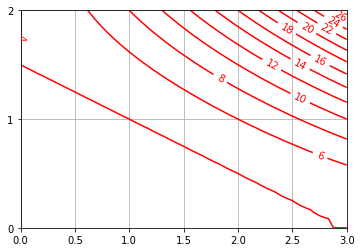

In [63]:
#4
def f(x,y):
    return x**2*y + 2*x*y**2 - 3*x*y +4

X = np.linspace(0,3,50)
Y = np.linspace(0,2,25)


z = np.array([[f(x,y) for x in X]
                      for y in Y])

c = plt.contour(X, Y, z, 12, colors='red')

ax = plt.gca()
ax.set(aspect = 'equal',
       yticks = np.arange(0,3,1))
plt.grid(True)
plt.clabel(c, fmt="%.0f");


###B. Er punktur í plani?

Í þessu dæmi á að skrifa Python-fall til að kanna hvort gefinn punktur liggi í gefnu plani í þrívíðu rúmi. Vegna þess að Python reiknar með endanlegri nákvæmni verður að láta duga að athuga hvort punkturinn sé í planinu eða mjög nálægt því.

1. Skrifið Python-fall ```næstum_eins(u,v)``` sem skilar sönnu (```True```) ef  í þeim skilningi að fjarlægðin milli vigranna $u$ og $v$ sé minni en $10^{-8}$ , en annars ósönnu (```False```). Prófið með pari vigra sem eru ólíkir og pari mjög líkra vigra.

2. Í kafla 2.11 er gefið skilyrði (merkt (*)), sem nota má til að kanna hvort punktur (eða vigur) $u$ sé í planinu sem tveir þverstaðlaðir vigrar $a$ og $b$ spanna, sbr. sýnidæmið aftast í greininni. Fyrir tvo vigra segir reglan að það gildi þ.þ.a.a. $$u = (a \cdot u)a + (b \cdot u)b$$ Skrifið Python-fall ```í_plani(u,a,b)``` þar sem stikarnir eru vigrar í $\mathbb{R}^3$ og {a,b} er þverstaðlaður grunnur. Það á að nota fallið úr a-lið til að rannsaka hvort $u$ sé (næstum) í planinu sem  og  spanna.

3. Prófið fallið úr b-lið með vigrunum og punktunum sem gefnir eru í sýnidæminu, sem sé $a = (0.48, 0.64, 0,60)$, $b = (0.8, -0.6, 0)$ , og svo:

  a) $u = A = (4,2,3)$ (í planinu) og
  
  b) $u = B = (6,3,2)$ (ekki í planinu).

In [19]:
#1

import numpy as np
import numpy.linalg as la

def næstum_eins(u,v):
  dist = np.linalg.norm(u-v)    
  return (dist < 10**-8)
    
u1 = np.array([1.000000001, 0.999999999])
v1 = np.array([1, 1])
print(næstum_eins(u1,v1))

u2 = np.array([1,2,3])
v2 = np.array([2,3,4])
print(næstum_eins(u2,v2))


True
False


In [15]:
#2

def í_plani(u,a,b):
  x = (a @ u) * a + (b @ u) * b
  return(næstum_eins(u,x))

In [17]:
#3

a = np.array([0.48,0.64,0.60])
b = np.array([0.8,-0.6,0])
A = np.array([4,2,3])
B = np.array([6,3,2])

print(í_plani(A,a,b))
print(í_plani(B,a,b))

True
False
